In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import Variable Labels for questionnaire, demographics, exam, and lab
quest_vars = pd.read_csv(r"C:\Users\dsh_m\Downloads\NHANES_var 1999 - Questionnaire.csv")
demo_vars = pd.read_csv(r"C:\Users\dsh_m\Downloads\NHANES_var 1999 - Demographics.csv")
exam_vars = pd.read_csv(r"C:\Users\dsh_m\Downloads\NHANES_var 1999 - Exam.csv")
lab_vars = pd.read_csv(r"C:\Users\dsh_m\Downloads\NHANES_var 1999 - Lab.csv")

In [3]:
demo_vars.columns

Index(['Variable Name', 'Variable Description', 'Data File Name',
       'Data File Description', 'Begin Year', 'EndYear', 'Component',
       'Use Constraints'],
      dtype='object')

In [4]:
# bring in Demographics 1999 - 2000 # https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/DEMO.xpt 
# reference document - https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/DEMO.htm # Demographic Variables & Sample Weights

In [5]:
# Demographics variable list https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Demographics&Cycle=1999-2000
demo = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/DEMO.xpt', format = 'xport', )
demo.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,10094.017100,9912.461855,9727.078709,10041.524113,9.953956e+03,9857.381983,9865.152486,10327.992682,9809.165049,10323.315747
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,27186.728682,27324.345051,28099.663528,27757.066921,2.804929e+04,26716.602006,26877.704909,27268.025234,27406.383620,26984.812909
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,43993.193099,44075.386428,46642.563799,44967.681579,4.457248e+04,44087.945688,44831.370881,44480.987235,45389.112766,43781.905637
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,10702.307249,10531.444441,10346.119327,10636.063039,5.397605e-79,10533.108939,10654.749584,10851.024385,10564.981435,11012.529729
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,93164.782430,92119.608772,95388.490406,94131.383538,9.529781e+04,91325.082461,91640.586117,92817.926915,94282.855382,91993.251203


In [6]:
#demo['SEQN'] = demo['SEQN'].astype('string')
#demo['SEQN'].str.rstrip(".0").str.lstrip('0')

In [7]:
selected_demo_labels = {'RIDAGEYR':'AgeYears','RIAGENDR':'Gender','RIDAGEMN':'AgeMonthsScrn','RIDAGEEX':'AgeMonthsExam','RIDRETH1':'RaceEthnicity', 'RIDRETH2':'RaceEthnicity2', 'DMDBORN':'CountryBorn', 'DMDCITZN':'UScitizen',"DMDEDUC":'Education', 'DMQMILIT':'ArmedForces', 'INDHHINC':'HouseholdIncome'}

In [8]:
#Map descriptions to column labels
demographics_dict = dict(zip(demo_vars['Variable Name'], demo_vars['Variable Description']))
questionnaire_dict = dict(zip(quest_vars['Variable Name'], quest_vars['Variable Description']))
exam_dict = dict(zip(exam_vars['Variable Name'], exam_vars['Variable Description']))
lab_dict = dict(zip(lab_vars['Variable Name'], lab_vars['Variable Description']))

In [9]:
selected_demos = demo[['SEQN','RIDAGEYR','RIAGENDR','RIDAGEMN','RIDAGEEX','RIDRETH1', 'RIDRETH2', 'DMDBORN', 'DMDCITZN',"DMDEDUC", 'DMQMILIT', 'INDHHINC']].copy()
selected_demos.rename(columns=selected_demo_labels, inplace=True)
selected_demos.head()

,SEQN,AgeYears,Gender,AgeMonthsScrn,AgeMonthsExam,RaceEthnicity,RaceEthnicity2,CountryBorn,UScitizen,Education,ArmedForces,HouseholdIncome
0,1.0,2.0,2.0,29.0,31.0,4.0,2.0,1.0,1.0,NaN,NaN,3.0
1,2.0,77.0,1.0,926.0,926.0,3.0,1.0,1.0,1.0,3.0,1.0,8.0
2,3.0,10.0,2.0,125.0,126.0,3.0,1.0,3.0,2.0,1.0,NaN,6.0
3,4.0,1.0,1.0,22.0,23.0,4.0,2.0,1.0,1.0,NaN,NaN,3.0
4,5.0,49.0,1.0,597.0,597.0,3.0,1.0,1.0,1.0,3.0,1.0,11.0


In [10]:
adults = selected_demos[selected_demos['AgeYears']>17].sort_values('AgeYears')
adults.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5448 entries, 4113 to 6299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             5448 non-null   float64
 1   AgeYears         5448 non-null   float64
 2   Gender           5448 non-null   float64
 3   AgeMonthsScrn    5275 non-null   float64
 4   AgeMonthsExam    4843 non-null   float64
 5   RaceEthnicity    5448 non-null   float64
 6   RaceEthnicity2   5448 non-null   float64
 7   CountryBorn      5439 non-null   float64
 8   UScitizen        5446 non-null   float64
 9   Education        5446 non-null   float64
 10  ArmedForces      5446 non-null   float64
 11  HouseholdIncome  4584 non-null   float64
dtypes: float64(12)
memory usage: 553.3 KB


In [11]:
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/DEMO.htm
# Gender 1 M 2 F; RaceEthnicity 1 MexAm; 2 OtherHisp; 3 NonHispWhite; 4 NonHispBlack; 5 Other_Multiraciaol
# RaceEthnicity2 1 NonHispWhite; 2 NonHispBlack; 3 MexAm; 4 Other_Multiraciaol; 5 OtherHisp;
# Armed Forces 1 Yes 2 No 7 Refused 9 DontKnow; CountryBorn 1 US, 2 Mexico, 3 Elsewhere, 7 Refused 9 DontKnow;
# US Citizen 1 Yes 2 No 7 Refused 9 DontKnow; Education: 1 LessThanHS 2 HS 3 MoreThanHS 7 Refused 9 DontKnow; 
#

In [12]:
adults['Gender'] = adults['Gender'].astype('category')
adults['RaceEthnicity'] = adults['RaceEthnicity'].astype('category')
adults['RaceEthnicity2'] = adults['RaceEthnicity2'].astype('category')
adults['CountryBorn'] = adults['CountryBorn'].astype('category')
adults['UScitizen'] = adults['UScitizen'].astype('category')
adults['Education'] = adults['Education'].astype('category')
adults['ArmedForces'] = adults['ArmedForces'].astype('category')
adults['HouseholdIncome'] = adults['HouseholdIncome'].astype('category')
# adults['SEQN'] = adults['SEQN'].astype('string')

#adults.describe()
adults.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5448 entries, 4113 to 6299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SEQN             5448 non-null   float64 
 1   AgeYears         5448 non-null   float64 
 2   Gender           5448 non-null   category
 3   AgeMonthsScrn    5275 non-null   float64 
 4   AgeMonthsExam    4843 non-null   float64 
 5   RaceEthnicity    5448 non-null   category
 6   RaceEthnicity2   5448 non-null   category
 7   CountryBorn      5439 non-null   category
 8   UScitizen        5446 non-null   category
 9   Education        5446 non-null   category
 10  ArmedForces      5446 non-null   category
 11  HouseholdIncome  4584 non-null   category
dtypes: category(8), float64(4)
memory usage: 257.4 KB


In [13]:
#adults['SEQN'].str.rstrip(".0")
adults.head()

,SEQN,AgeYears,Gender,AgeMonthsScrn,AgeMonthsExam,RaceEthnicity,RaceEthnicity2,CountryBorn,UScitizen,Education,ArmedForces,HouseholdIncome
4113,4114.0,18.0,1.0,216.0,217.0,4.0,2.0,1.0,1.0,1.0,2.0,NaN
9605,9606.0,18.0,2.0,224.0,225.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0
8482,8483.0,18.0,1.0,225.0,227.0,1.0,3.0,1.0,1.0,1.0,2.0,NaN
5936,5937.0,18.0,2.0,219.0,219.0,1.0,3.0,2.0,2.0,1.0,2.0,NaN
3761,3762.0,18.0,2.0,226.0,228.0,1.0,3.0,2.0,1.0,3.0,2.0,4.0


In [14]:

# apply the detailed text labels to the selected columns
selected_demos2 = selected_demos.copy()
selected_demos2.rename(columns=demographics_dict, inplace=True)
#selected_demos2.columns
#selected_demos2.tail()

In [15]:
# Selected exam tables
# exam variable list https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Examination&Cycle=1999-2000

In [16]:
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/BPX.htm - values for each variable
bp_exam = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/BPX.xpt', format = 'xport', )
cardio_fit_exam = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/CVX.xpt', format = 'xport', )
body_meas_exam = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/BMX.xpt', format = 'xport', )
muscle_strength_exam = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/MSX.xpt', format = 'xport', )
body_meas_exam = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/BMX.xpt', format = 'xport', )
shared_exclusion_exam = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/SEQ.xpt',format = 'xport', )

In [17]:
adults_exclusion = adults.merge(shared_exclusion_exam, how = 'left', on = 'SEQN')
adults_exclusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5448 entries, 0 to 5447
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SEQN             5448 non-null   float64 
 1   AgeYears         5448 non-null   float64 
 2   Gender           5448 non-null   category
 3   AgeMonthsScrn    5275 non-null   float64 
 4   AgeMonthsExam    4843 non-null   float64 
 5   RaceEthnicity    5448 non-null   category
 6   RaceEthnicity2   5448 non-null   category
 7   CountryBorn      5439 non-null   category
 8   UScitizen        5446 non-null   category
 9   Education        5446 non-null   category
 10  ArmedForces      5446 non-null   category
 11  HouseholdIncome  4584 non-null   category
 12  SEQ010           4929 non-null   float64 
 13  SEQ020           4865 non-null   float64 
 14  SEQ030           4841 non-null   float64 
 15  SEQ040           4809 non-null   float64 
 16  SEQ050           9 non-null      float64 


In [18]:
# Selected Lab tables
# Lab Variable List: https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Laboratory&Cycle=1999-2000

In [19]:
cadmium_lead_mercury = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/LAB06.xpt', format = 'xport', )
caffeine = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/SSCAFE_A.xpt', format = 'xport')
fasting = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/PH.xpt', format = 'xport')
metals_urine = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/LAB06HM.xpt',format = 'xport')
PFC_serum = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/SSPFC_A.xpt', format = 'xport')
pest_serum = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/LAB26PP.xpt', format = 'xport')
pthal_urine = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/PHPYPA.xpt', format = 'xport')
volatile_organic = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/LAB04.xpt', format = 'xport')
volatile_oraganic_monitor_badge = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/LAB21.xpt', format = 'xport')
dioxins = pd.read_sas(r"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/LAB28POC.xpt", format = 'xport')
perflour = pd.read_sas(r"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/SSPFC_A.xpt", format = 'xport')


In [20]:
#Lab_merge = caffeine.merge(cadmium_lead_mercury, how = 'outer', on = 'SEQN').merge(fasting, how = 'outer', on = 'SEQN').merge(metals_urine, how = 'outer', on = 'SEQN').merge(PFC_serum, how = 'outer', on = 'SEQN').merge(pest_serum,how = 'outer', on = 'SEQN').merge(pthal_urine, how = 'outer', on = 'SEQN').merge(volatile_organic,how = 'outer', on = 'SEQN').merge(volatile_oraganic_monitor_badge, how = 'outer', on = 'SEQN').merge(dioxins, how = 'outer', on = 'SEQN').merge(perflour, how = 'outer', on = 'SEQN')
#Lab_merge.head(2)

In [21]:
caffeine.columns

Index(['SEQN', 'WTSSCAF2', 'WTSSCAF4', 'SSMU1', 'SSMU1LC', 'SSMU3', 'SSMU3LC',
       'SSMU4', 'SSMU4LC', 'SSMU5', 'SSMU5LC', 'SSMU6', 'SSMU6LC', 'SSMU7',
       'SSMU7LC', 'SSMX1', 'SSMX1LC', 'SSMX2', 'SSMX2LC', 'SSMX3', 'SSMX3LC',
       'SSMX4', 'SSMX4LC', 'SSMX5', 'SSMX5LC', 'SSMX6', 'SSMX6LC', 'SSMX7',
       'SSMX7LC', 'SSAMU', 'SSAMULC'],
      dtype='object')

In [22]:
cols_caff = ['SSMU1LC',  'SSMU3LC','SSMU4LC',  'SSMU5LC', 'SSMU6LC', 'SSMU7LC', 'SSMX1LC', 'SSMX2LC',  'SSMX3LC','SSMX4LC', 'SSMX5LC', 'SSMX6LC', 'SSMX7LC', 'SSAMULC']
for col in cols_caff:
    caffeine[col] = caffeine[col].astype('category')

In [23]:
adult_caffeine = adults.merge(caffeine, on='SEQN')
adult_caffeine.columns

Index(['SEQN', 'AgeYears', 'Gender', 'AgeMonthsScrn', 'AgeMonthsExam',
       'RaceEthnicity', 'RaceEthnicity2', 'CountryBorn', 'UScitizen',
       'Education', 'ArmedForces', 'HouseholdIncome', 'WTSSCAF2', 'WTSSCAF4',
       'SSMU1', 'SSMU1LC', 'SSMU3', 'SSMU3LC', 'SSMU4', 'SSMU4LC', 'SSMU5',
       'SSMU5LC', 'SSMU6', 'SSMU6LC', 'SSMU7', 'SSMU7LC', 'SSMX1', 'SSMX1LC',
       'SSMX2', 'SSMX2LC', 'SSMX3', 'SSMX3LC', 'SSMX4', 'SSMX4LC', 'SSMX5',
       'SSMX5LC', 'SSMX6', 'SSMX6LC', 'SSMX7', 'SSMX7LC', 'SSAMU', 'SSAMULC'],
      dtype='object')

In [24]:
# looks like no demographic and caffeine relationship
adult_caffeine2 = adult_caffeine[['SEQN','AgeYears','RaceEthnicity2', 'CountryBorn', 'UScitizen',
       'Education', 'ArmedForces', 'HouseholdIncome', 'SSMU1', 'SSMU3', 'SSMU4','SSMU5','SSMU6', 'SSMU7','SSMX1', 'SSMX2','SSMX3', 'SSMX4', 'SSMX5', 'SSMX6', 'SSMX7', 'SSAMU']]
adult_caffeine2.corr()
# Caffeine measures are correlated among themselves, but not with any demographics

,SEQN,AgeYears,RaceEthnicity2,CountryBorn,UScitizen,Education,ArmedForces,HouseholdIncome,SSMU1,SSMU3,...,SSMU6,SSMU7,SSMX1,SSMX2,SSMX3,SSMX4,SSMX5,SSMX6,SSMX7,SSAMU
SEQN,1.000000,0.010732,-0.046494,-0.027125,0.006266,0.048845,-0.013519,0.042332,-0.054804,-0.016408,...,0.020127,-0.016800,-0.046881,-0.014440,-0.006505,-0.022805,-0.018241,0.030782,-0.023423,-0.020252
AgeYears,0.010732,1.000000,-0.134116,-0.010825,-0.071378,-0.049341,-0.193181,-0.077961,0.047367,0.013159,...,-0.132844,0.031908,-0.059523,-0.040891,-0.118755,0.088180,-0.016265,-0.144210,0.114287,0.038868
RaceEthnicity2,-0.046494,-0.134116,1.000000,0.500086,0.246203,-0.244628,0.189191,-0.034132,-0.107081,-0.118510,...,-0.062409,-0.015314,-0.080717,-0.115713,-0.088383,-0.005352,0.034490,-0.027972,-0.027740,-0.052770
CountryBorn,-0.027125,-0.010825,0.500086,1.000000,0.400431,-0.134763,0.168758,-0.053969,-0.076453,-0.103615,...,-0.089830,-0.045377,-0.076580,-0.076304,-0.087215,0.018618,-0.006312,-0.051871,-0.030888,-0.082016
UScitizen,0.006266,-0.071378,0.246203,0.400431,1.000000,-0.102853,0.170118,0.045515,-0.080634,-0.090873,...,-0.075500,-0.049923,-0.078415,-0.071868,-0.080334,-0.003548,-0.056146,-0.060340,-0.052317,-0.071768
Education,0.048845,-0.049341,-0.244628,-0.134763,-0.102853,1.000000,0.085240,0.142713,0.009902,0.037183,...,0.083418,0.020821,0.052430,0.072140,0.059069,-0.005403,0.009007,0.090299,0.043467,-0.023724
ArmedForces,-0.013519,-0.193181,0.189191,0.168758,0.170118,0.085240,1.000000,-0.004373,-0.180279,-0.068317,...,-0.026109,-0.038868,-0.140894,-0.054281,-0.048999,-0.019028,-0.037919,0.008489,-0.028488,-0.102469
HouseholdIncome,0.042332,-0.077961,-0.034132,-0.053969,0.045515,0.142713,-0.004373,1.000000,-0.034557,-0.006702,...,0.026121,-0.008579,-0.014716,0.011820,0.013657,-0.026057,0.021241,0.053824,0.013615,-0.034082
SSMU1,-0.054804,0.047367,-0.107081,-0.076453,-0.080634,0.009902,-0.180279,-0.034557,1.000000,0.388001,...,0.314147,0.558461,0.883594,0.449282,0.392135,0.295840,0.571318,0.173293,0.347076,0.744431
SSMU3,-0.016408,0.013159,-0.118510,-0.103615,-0.090873,0.037183,-0.068317,-0.006702,0.388001,1.000000,...,0.831071,0.227403,0.315066,0.836195,0.893673,0.007774,0.177062,0.661159,0.100325,0.379001


In [25]:
# opening the file in read mode 
sel_lab_cols = open(r"C:\Users\dsh_m\Downloads\NHANES_var 1999 - Sheet8.csv") 
# reading the file 
data = sel_lab_cols.read() 
  
# replacing end splitting the text  
# when newline ('\n') is seen. 
lab_cols = data.split("\n") 
#print(lab_cols) 
sel_lab_cols.close() 


In [26]:
#lab_selected = Lab_merge[['SEQN','URDUCD', 'URDUCDLC', 'URXUBA', 'URXUBE', 'URXUCO', 'URXUCR', 'URXUCS', 'URXUMO', 'URXUPB', 'URXUPT', 'URXUSB', 'URXUTL', 'URXUTU', 'URDP09LC', 'URXDAZ', 'URXDMA', 'URXEQU', 'URXETD', 'URXETL', 'URXGNS', 'URXMBP', 'URXMCP', 'URXMEP', 'URXMHP', 'URXMNP', 'URXMOP', 'URXMZP', 'URXP09', 'URXUCR', 'LBDV3ALC', 'LBDV4CLC', 'LBDVBFLC', 'LBDVBMLC', 'LBDVBZLC', 'LBDVCFLC', 'LBDVCMLC', 'LBDVCTLC', 'LBDVDBLC', 'LBDVEBLC', 'LBDVMELC', 'LBDVOXLC', 'LBDVSTLC', 'LBDVTCLC', 'LBDVTOLC', 'LBDVXYLC', 'LBDWBFLC', 'LBDWBMLC', 'LBDWCFLC', 'LBDWCMLC', 'LBDWMELC', 'LBXV3A', 'LBXV4C', 'LBXVBF', 'LBXVBM', 'LBXVBZ', 'LBXVCF', 'LBXVCM', 'LBXVCT', 'LBXVDB', 'LBXVEB', 'LBXVME', 'LBXVOX', 'LBXVST', 'LBXVTC', 'LBXVTO', 'LBXVXY', 'LBXWBF', 'LBXWBM', 'LBXWCF', 'LBXWCM', 'LBXWME', 'LBDIHGSI', 'LBDRSTSI', 'LBDTHGSI', 'LBXB12', 'LBXBCD', 'LBXBPB', 'LBXCOT', 'LBXEPP', 'LBXFER', 'LBXFOL', 'LBXGTC', 'LBXHCY', 'LBXIHG', 'LBXIRN', 'LBXMMA', 'LBXPCT', 'LBXRBF', 'LBXRPL', 'LBXRST', 'LBXSEL', 'LBXTHG', 'LBXTIB', 'LBXVIA', 'LBXVIE', 'URXUHG', 'LBDBHC', 'LBDBHCLA', 'LBDBHCLC', 'LBDD01LC', 'LBDD03LC', 'LBDD04LC', 'LBDD05LC', 'LBDD07LC', 'LBDF01LC', 'LBDF02LC', 'LBDF03LC', 'LBDF04LC', 'LBDF05LC', 'LBDF06LC', 'LBDF07LC', 'LBDF08LC', 'LBDF10LC', 'LBDGHCLC', 'LBDHCBLC', 'LBDHPELC', 'LBDHXCLC', 'LBDMIRLC', 'LBDODTLC', 'LBDOXYLC', 'LBDPCBLC', 'LBDPDELC', 'LBDPDTLC', 'LBDTC2LC', 'LBDTCDLC', 'LBDTNALC', 'LBX028', 'LBX028LA', 'LBX052', 'LBX052LA', 'LBX066', 'LBX066LA', 'LBX074', 'LBX074LA', 'LBX099', 'LBX099LA', 'LBX101', 'LBX101LA', 'LBX105', 'LBX105LA', 'LBX118', 'LBX118LA', 'LBX128', 'LBX128LA', 'LBX138', 'LBX138LA', 'LBX146', 'LBX146LA', 'LBX153', 'LBX153LA', 'LBX156', 'LBX156LA', 'LBX157', 'LBX157LA', 'LBX167', 'LBX167LA', 'LBX170', 'LBX170LA', 'LBX172', 'LBX172LA', 'LBX177', 'LBX177LA', 'LBX178', 'LBX178LA', 'LBX180', 'LBX180LA', 'LBX183', 'LBX183LA', 'LBX187', 'LBX187LA', 'LBXD01', 'LBXD01LA', 'LBXD03', 'LBXD03LA', 'LBXD04', 'LBXD04LA', 'LBXD05', 'LBXD05LA', 'LBXD07', 'LBXD07LA', 'LBXF01', 'LBXF01LA', 'LBXF02', 'LBXF02LA', 'LBXF03', 'LBXF03LA', 'LBXF04', 'LBXF04LA', 'LBXF05', 'LBXF05LA', 'LBXF06', 'LBXF06LA', 'LBXF07', 'LBXF07LA', 'LBXF08', 'LBXF08LA', 'LBXF10', 'LBXF10LA', 'LBXGHC', 'LBXGHCLA', 'LBXHCB', 'LBXHCBLA', 'LBXHPE', 'LBXHPELA', 'LBXHXC', 'LBXHXCLA', 'LBXMIR', 'LBXMIRLA', 'LBXODT', 'LBXODTLA', 'LBXOXY', 'LBXOXYLA', 'LBXPCB', 'LBXPCBLA', 'LBXPDE', 'LBXPDELA', 'LBXPDT', 'LBXPDTLA', 'LBXTC2', 'LBXTC2LA', 'LBXTCD', 'LBXTCDLA', 'LBXTNA', 'LBXTNALA', 'URD25TLC', 'URD4FPLC', 'URDALALC', 'URDATZLC', 'URDCB3LC', 'URDCBFLC', 'URDCCCLC', 'URDCPMLC', 'URDDEELC', 'URDDIZLC', 'URDMALLC', 'URDOPMLC', 'URDPARLC', 'URDPPXLC', 'URDTCCLC', 'URX24D', 'URX25T', 'URX4FP', 'URXALA', 'URXATZ', 'URXCB3', 'URXCBF', 'URXCCC', 'URXCPM', 'URXDEE', 'URXDIZ', 'URXMAL', 'URXOP1', 'URXOP2', 'URXOP3', 'URXOP4', 'URXOP5', 'URXOP6', 'URXOPM', 'URXPAR', 'URXPPX', 'URXTCC', 'URXUCR', 'SSAMU', 'SSAMULC', 'SSMU1', 'SSMU1LC', 'SSMU3', 'SSMU3LC', 'SSMU4', 'SSMU4LC', 'SSMU5', 'SSMU5LC', 'SSMU6', 'SSMU6LC', 'SSMU7', 'SSMU7LC', 'SSMX1', 'SSMX1LC', 'SSMX2', 'SSMX2LC', 'SSMX3', 'SSMX3LC', 'SSMX4', 'SSMX4LC', 'SSMX5', 'SSMX5LC', 'SSMX6', 'SSMX6LC', 'SSMX7', 'SSMX7LC']].copy()

In [27]:
#print(lab_selected)

In [28]:
#lab_selected['SEQN'].astype('string')

In [29]:
#lab_selected['SEQN']=lab_selected['SEQN'].str.rstrip(".0").str.lstrip('0')
#print(lab_selected.head(20))

In [30]:
adult_cadmium_lead_mercury = adults.merge(cadmium_lead_mercury, how ='left', on = 'SEQN').sort_values('SEQN')
#adult_cadmium_lead_mercury.head(30).sort_values('AgeYears', ascending = False)
#adult_cadmium_lead_mercury.corr()


In [31]:
# Select Questionnaire tables
# Ques variables https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Questionnaire&Cycle=1999-2000
# https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/ALQ.htm

In [32]:
alcoholq = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/ALQ.xpt', format = 'xport')
#alcoholq.columns
alcohol_screen = alcoholq[['SEQN', 'ALQ100', 'ALQ110']].copy()
alcohol_screen.rename(columns = questionnaire_dict, inplace=True)
# alcohol_screen.head() #successful


In [33]:
medical_condq = pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/MCQ.xpt', format = 'xport')
#medical_condq.columns
medical_conditions_selected = medical_condq[['SEQN','MCQ010','MCQ100','MCQ114','MCQ160A','MCQ160B','MCQ160C','MCQ160D','MCQ160E','MCQ160F','MCQ160G','MCQ220','MCQ250A','MCQ250B','MCQ250C', 'MCQ250D','MCQ250E','MCQ250F','MCQ250G']].copy()
medical_conditions_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9493 entries, 0 to 9492
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     9493 non-null   float64
 1   MCQ010   9493 non-null   float64
 2   MCQ100   1989 non-null   float64
 3   MCQ114   1084 non-null   float64
 4   MCQ160A  4880 non-null   float64
 5   MCQ160B  4880 non-null   float64
 6   MCQ160C  4880 non-null   float64
 7   MCQ160D  4880 non-null   float64
 8   MCQ160E  4880 non-null   float64
 9   MCQ160F  4880 non-null   float64
 10  MCQ160G  4880 non-null   float64
 11  MCQ220   4880 non-null   float64
 12  MCQ250A  4880 non-null   float64
 13  MCQ250B  4880 non-null   float64
 14  MCQ250C  4880 non-null   float64
 15  MCQ250D  4880 non-null   float64
 16  MCQ250E  4880 non-null   float64
 17  MCQ250F  4880 non-null   float64
 18  MCQ250G  4880 non-null   float64
dtypes: float64(19)
memory usage: 1.4 MB


In [34]:
cols_dtype = ['MCQ010', 'MCQ100', 'MCQ114', 'MCQ160A', 'MCQ160B', 'MCQ160C',
       'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 'MCQ220', 'MCQ250A',
       'MCQ250B', 'MCQ250C', 'MCQ250D', 'MCQ250E', 'MCQ250F', 'MCQ250G']

for col in cols_dtype:
    medical_conditions_selected[col] = medical_conditions_selected[col].astype('category')

In [35]:
med_cond_labels = {'MCQ010':'asthma', 'MCQ100':'bp', 'MCQ114':'tested_lead', 'MCQ120C':'headaches', 'MCQ160A':'arthritis','MCQ160B':'congestive_heart','MCQ160C':'coronary','MCQ160D':'angina', 'MCQ160E':'heart_attack','MCQ160F':'stroke', 'MCQ160G':'emphysena',
       'MCQ220':'cancer', 'MCQ250A':'FHdiabetes', 'MCQ250B':'FHalzheimers', 'MCQ250C':'FHasthma', 'MCQ250D':'FHarthritis', 'MCQ250E':'FHosteoporosis',
       'MCQ250F':'FHbp_stroke', 'MCQ250G':'FHheartattack'}

In [36]:
medical_conditions_selected.rename(columns=med_cond_labels, inplace=True)
medical_conditions_selected.head()
#medical_conditions_selected['SEQN'] = medical_conditions_selected['SEQN'].astype('string')



,SEQN,asthma,bp,tested_lead,arthritis,congestive_heart,coronary,angina,heart_attack,stroke,emphysena,cancer,FHdiabetes,FHalzheimers,FHasthma,FHarthritis,FHosteoporosis,FHbp_stroke,FHheartattack
0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,9.0,2.0,2.0
2,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [37]:
medical_conditions_selected.columns

Index(['SEQN', 'asthma', 'bp', 'tested_lead', 'arthritis', 'congestive_heart',
       'coronary', 'angina', 'heart_attack', 'stroke', 'emphysena', 'cancer',
       'FHdiabetes', 'FHalzheimers', 'FHasthma', 'FHarthritis',
       'FHosteoporosis', 'FHbp_stroke', 'FHheartattack'],
      dtype='object')

In [38]:
medical_conditions_selected.columns

Index(['SEQN', 'asthma', 'bp', 'tested_lead', 'arthritis', 'congestive_heart',
       'coronary', 'angina', 'heart_attack', 'stroke', 'emphysena', 'cancer',
       'FHdiabetes', 'FHalzheimers', 'FHasthma', 'FHarthritis',
       'FHosteoporosis', 'FHbp_stroke', 'FHheartattack'],
      dtype='object')

In [39]:
cond_to_score = ['asthma', 'bp','tested_lead', 'arthritis', 'congestive_heart', 'coronary', 'angina','heart_attack', 'stroke', 'emphysena', 'cancer']

medical_conditions_selected['condition_score'] = (medical_conditions_selected[cond_to_score]==1).sum(axis=1)
medical_conditions_selected.sort_values('condition_score', ascending = False)
#adults_med_cond['condition_score'] = (adults_med_cond[['asthma', 'bp','tested_lead', 'arthritis', 'congestive_heart', 'coronary', 'angina','heart_attack', 'stroke', 'emphysena', 'cancer']]==1).sum(axis=1)
#adults_med_cond

,SEQN,asthma,bp,tested_lead,arthritis,congestive_heart,coronary,angina,heart_attack,stroke,emphysena,cancer,FHdiabetes,FHalzheimers,FHasthma,FHarthritis,FHosteoporosis,FHbp_stroke,FHheartattack,condition_score
3132,3292.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
3737,3925.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,7
6016,6299.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,7
5672,5941.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,7
8739,9172.0,1.0,NaN,NaN,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,5080.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0
4846,5079.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
4845,5078.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1572,1655.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [40]:
fh_to_score = ['cancer', 'FHdiabetes',
       'FHalzheimers', 'FHasthma', 'FHarthritis', 'FHosteoporosis',
       'FHbp_stroke', 'FHheartattack']
medical_conditions_selected['FamilyHistory_score'] = (medical_conditions_selected[fh_to_score]==1).sum(axis=1)
medical_conditions_selected.sort_values('condition_score', ascending = False)

,SEQN,asthma,bp,tested_lead,arthritis,congestive_heart,coronary,angina,heart_attack,stroke,...,cancer,FHdiabetes,FHalzheimers,FHasthma,FHarthritis,FHosteoporosis,FHbp_stroke,FHheartattack,condition_score,FamilyHistory_score
3132,3292.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,1
3737,3925.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,7,2
6016,6299.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,7,3
5672,5941.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,7,2
8739,9172.0,1.0,NaN,NaN,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,5080.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0,1
4846,5079.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0
4845,5078.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0,1
1572,1655.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [41]:
medical_conditions_selected['cancer'].unique()

[NaN, 1.0, 2.0, 9.0]
Categories (3, float64): [1.0, 2.0, 9.0]

In [42]:
adults_med_cond = adults.merge(medical_conditions_selected, how = 'left', on = 'SEQN')
adults_med_cond.tail()

,SEQN,AgeYears,Gender,AgeMonthsScrn,AgeMonthsExam,RaceEthnicity,RaceEthnicity2,CountryBorn,UScitizen,Education,...,cancer,FHdiabetes,FHalzheimers,FHasthma,FHarthritis,FHosteoporosis,FHbp_stroke,FHheartattack,condition_score,FamilyHistory_score
5443,6406.0,85.0,1.0,NaN,NaN,3.0,1.0,1.0,1.0,3.0,...,2.0,1.0,2.0,2.0,2.0,2.0,9.0,9.0,1,1
5444,6458.0,85.0,2.0,NaN,NaN,4.0,2.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1,3
5445,1548.0,85.0,2.0,NaN,NaN,3.0,1.0,1.0,1.0,3.0,...,1.0,2.0,2.0,2.0,9.0,9.0,2.0,2.0,5,1
5446,5803.0,85.0,2.0,NaN,NaN,3.0,1.0,1.0,1.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0
5447,6300.0,85.0,2.0,NaN,NaN,1.0,3.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0


In [43]:
adults_med_cond.columns

Index(['SEQN', 'AgeYears', 'Gender', 'AgeMonthsScrn', 'AgeMonthsExam',
       'RaceEthnicity', 'RaceEthnicity2', 'CountryBorn', 'UScitizen',
       'Education', 'ArmedForces', 'HouseholdIncome', 'asthma', 'bp',
       'tested_lead', 'arthritis', 'congestive_heart', 'coronary', 'angina',
       'heart_attack', 'stroke', 'emphysena', 'cancer', 'FHdiabetes',
       'FHalzheimers', 'FHasthma', 'FHarthritis', 'FHosteoporosis',
       'FHbp_stroke', 'FHheartattack', 'condition_score',
       'FamilyHistory_score'],
      dtype='object')

In [44]:
adult_cancer = adults_med_cond[adults_med_cond['cancer']==1.0]
adult_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 668 to 5445
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   SEQN                 386 non-null    float64 
 1   AgeYears             386 non-null    float64 
 2   Gender               386 non-null    category
 3   AgeMonthsScrn        353 non-null    float64 
 4   AgeMonthsExam        314 non-null    float64 
 5   RaceEthnicity        386 non-null    category
 6   RaceEthnicity2       386 non-null    category
 7   CountryBorn          384 non-null    category
 8   UScitizen            386 non-null    category
 9   Education            386 non-null    category
 10  ArmedForces          386 non-null    category
 11  HouseholdIncome      328 non-null    category
 12  asthma               386 non-null    category
 13  bp                   0 non-null      category
 14  tested_lead          0 non-null      category
 15  arthritis            386 

In [46]:
adult_bp_stroke =  adults_med_cond[(adults_med_cond['bp']==1.0) |  (adults_med_cond['stroke']==1.0)]
adult_bp_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 753 to 5445
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   SEQN                 190 non-null    float64 
 1   AgeYears             190 non-null    float64 
 2   Gender               190 non-null    category
 3   AgeMonthsScrn        169 non-null    float64 
 4   AgeMonthsExam        141 non-null    float64 
 5   RaceEthnicity        190 non-null    category
 6   RaceEthnicity2       190 non-null    category
 7   CountryBorn          190 non-null    category
 8   UScitizen            190 non-null    category
 9   Education            190 non-null    category
 10  ArmedForces          190 non-null    category
 11  HouseholdIncome      157 non-null    category
 12  asthma               190 non-null    category
 13  bp                   0 non-null      category
 14  tested_lead          0 non-null      category
 15  arthritis            190 

In [51]:
pesticideq= pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/PUQ.xpt', format = 'xport')

In [52]:
smokingq= pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/SMQ.xpt', format = 'xport')

In [53]:
famsmokq= pd.read_sas(r'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/1999/DataFiles/SMQFAM.xpt', format = 'xport')

In [55]:
#Mortality tables # https://ftp.cdc.gov/pub/Health_Statistics/NCHS/datalinkage/linked_mortality/

In [56]:
#  Help from Stack Overflow # .dat file is tab delimited text # to align the columns properly
with open(r"C:\Users\dsh_m\Downloads\NHANES_1999_2000_MORT_2019_PUBLIC.dat", "rb") as f:  # binary mode
    mort1999 = pd.DataFrame(
        [e.decode("latin-1") if e != b'\xa0' else None for e in l.strip().split()]
        for l in f
    )

In [58]:
mort1999.head()

,0,1,2,3,4
0,00001,2.,..,.,.
1,00002,1100600,177177,None,None
2,00003,2.,..,.,.
3,00004,2.,..,.,.
4,00005,10,..,244244,None


In [63]:
with open(r"C:\Users\dsh_m\Downloads\NHANES_2001_2002_MORT_2019_PUBLIC.dat", "rb") as f:  # binary mode
    mort2001 = pd.DataFrame(
        [e.decode("latin-1") if e != b'\xa0' else None for e in l.strip().split()]
        for l in f
    )
mort2001.head()


,0,1,2,3,4
0,09966,10,..,218217,None
1,09967,10,..,211210,None
2,09968,1101000,108107,None,None
3,09969,10,..,212211,None
4,09970,2.,..,.,.


In [65]:
mort = pd.concat([mort1999, mort2001], 
                  ignore_index = True)
#mort.info()

In [67]:
m_cols = {0:"SEQN",3:"SampleWeight1", 4:"SampleWeight2"}
mort.rename(columns = m_cols,  inplace=True)
mort.columns

Index(['SEQN', 1, 2, 'SampleWeight1', 'SampleWeight2'], dtype='object')

In [69]:
# idnetify string contents by index number to make df columns
mort['eligible'] = mort[1].str[0]

In [71]:
mort['deceased'] = mort[1].str[1]
#mort.head()

In [73]:
mort['cause_death'] = mort[1].str[2:5]
mort['diabetes'] = mort[1].str[6]
mort['hypertension'] = mort[1].str[7]
mort.tail(30)

,SEQN,1,2,SampleWeight1,SampleWeight2,eligible,deceased,cause_death,diabetes,hypertension
20974,20975,2.,..,.,.,2,.,,NaN,NaN
20975,20976,1100100,12,11,None,1,1,001,0,NaN
20976,20977,10,..,228227,None,1,0,,NaN,NaN
20977,20978,2.,..,.,.,2,.,,NaN,NaN
20978,20979,2.,..,.,.,2,.,,NaN,NaN
20979,20980,1100801,52,52,None,1,1,008,1,NaN
20980,20981,2.,..,.,.,2,.,,NaN,NaN
20981,20982,10,..,208208,None,1,0,,NaN,NaN
20982,20983,10,..,213212,None,1,0,,NaN,NaN
20983,20984,2.,..,.,.,2,.,,NaN,NaN


In [75]:
mort['mo_after_interview'] = mort[2].str[0:3]
mort['mo_after_exam'] = mort[2].str[-3:]
mort.rename(columns = {'0':"SEQN",'3':"SampleWeight1",'4':"SampleWeight2"})
mort.tail(30)

,SEQN,1,2,SampleWeight1,SampleWeight2,eligible,deceased,cause_death,diabetes,hypertension,mo_after_interview,mo_after_exam
20974,20975,2.,..,.,.,2,.,,NaN,NaN,..,..
20975,20976,1100100,12,11,None,1,1,001,0,NaN,12,12
20976,20977,10,..,228227,None,1,0,,NaN,NaN,..,..
20977,20978,2.,..,.,.,2,.,,NaN,NaN,..,..
20978,20979,2.,..,.,.,2,.,,NaN,NaN,..,..
20979,20980,1100801,52,52,None,1,1,008,1,NaN,52,52
20980,20981,2.,..,.,.,2,.,,NaN,NaN,..,..
20981,20982,10,..,208208,None,1,0,,NaN,NaN,..,..
20982,20983,10,..,213212,None,1,0,,NaN,NaN,..,..
20983,20984,2.,..,.,.,2,.,,NaN,NaN,..,..


In [156]:
mort['deceased'].sum()

3299

In [77]:
mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21004 entries, 0 to 21003
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SEQN                21004 non-null  object 
 1   1                   21004 non-null  object 
 2   2                   21004 non-null  object 
 3   SampleWeight1       19207 non-null  object 
 4   SampleWeight2       9574 non-null   object 
 5   eligible            21004 non-null  object 
 6   deceased            21004 non-null  object 
 7   cause_death         21004 non-null  object 
 8   diabetes            3297 non-null   object 
 9   hypertension        0 non-null      float64
 10  mo_after_interview  21004 non-null  object 
 11  mo_after_exam       21004 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.9+ MB


In [162]:
pd.to_numeric(mort['SEQN'], errors='coerce').isna().sum()
mort['SEQN'] = pd.to_numeric(mort['SEQN'], errors='coerce')


In [164]:
cols_mort = ['eligible', 'diabetes', 'hypertension']
for col in cols_mort:
    mort[col] = mort[col].astype('category')


In [166]:
# replace . in deceased column with 0
mort.loc[mort['deceased'] == '.', 'deceased'] = 0

In [168]:
#mort['cause_death'].str.replace('...','')
mort['cause_death']=pd.to_numeric(mort['cause_death'], errors='coerce')
mort['cause_death'].dtype

dtype('float64')

In [170]:
mort['deceased']=mort['deceased'].astype('int64')
#mort.info()

In [172]:
mort['mo_after_interview'] = pd.to_numeric(mort['mo_after_interview'], errors='coerce') 
print(mort_dem[['AgeMonthsScrn', 'mo_after_interview']].dtypes)

AgeMonthsScrn         float64
mo_after_interview    float64
dtype: object


In [174]:
mort_labels = pd.read_csv(r"C:\Users\dsh_m\Downloads\NHANES_var 1999 - Mortality (1).csv")
mort_labels

,CauseDeathNum,CauseDeathLbl
0,1,Diseases of heart
1,2,Malignant neoplasms
2,3,Chronic lower respiratory diseases
3,4,Accidents (unintentional linjuries)
4,5,Cerebrovascular diseases
5,6,Alzheimer’s disease
6,7,Diabetes mellitus
7,8,Influenza and pneumonia
8,9,Nephritis nephrotic syndrome
9,10,All other causes (residual)


In [176]:
mortl = mort.merge(mort_labels, left_on ='cause_death', right_on = 'CauseDeathNum')
mortl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SEQN                3297 non-null   int64   
 1   1                   3297 non-null   object  
 2   2                   3297 non-null   object  
 3   SampleWeight1       1500 non-null   object  
 4   SampleWeight2       0 non-null      object  
 5   eligible            3297 non-null   category
 6   deceased            3297 non-null   int64   
 7   cause_death         3297 non-null   float64 
 8   diabetes            3297 non-null   category
 9   hypertension        0 non-null      category
 10  mo_after_interview  3297 non-null   float64 
 11  mo_after_exam       3297 non-null   object  
 12  CauseDeathNum       3297 non-null   int64   
 13  CauseDeathLbl       3297 non-null   object  
dtypes: category(3), float64(2), int64(3), object(6)
memory usage: 293.5+ KB


In [182]:
 # Demographics only available on 1999, so it broke the numbers :(
# mort_dem.info()

mort['mo_after_interview'] =pd.to_numeric(mort['mo_after_interview'], errors='coerce')
print(mort_dem[['AgeMonthsScrn', 'mo_after_interview']].dtypes)



In [188]:
#mort_dem.loc[
#    (mort_dem['AgeYears'] == 85) & (mort_dem['AgeMonthsScrn'].isna()),
#    'AgeMonthsScrn'
#] = 85 * 12
# Calculate months old at time of death
#mort_dem['MonthsOld_mort'] = mort_dem['AgeMonthsScrn'] + mort_dem['mo_after_interview']
#mort_dem['YearsOld_mort'] = mort_dem['MonthsOld_mort'] / 12
#mort_dem['death_age_decade'] = (mort_dem['YearsOld_mort'] // 10) * 10

In [190]:
# mort_dem.tail(50)
#mort_dem['MonthsOld_mort'].unique()

In [192]:
#mort_dem.columns

<Axes: xlabel='Count', ylabel='CauseDeathLbl'>

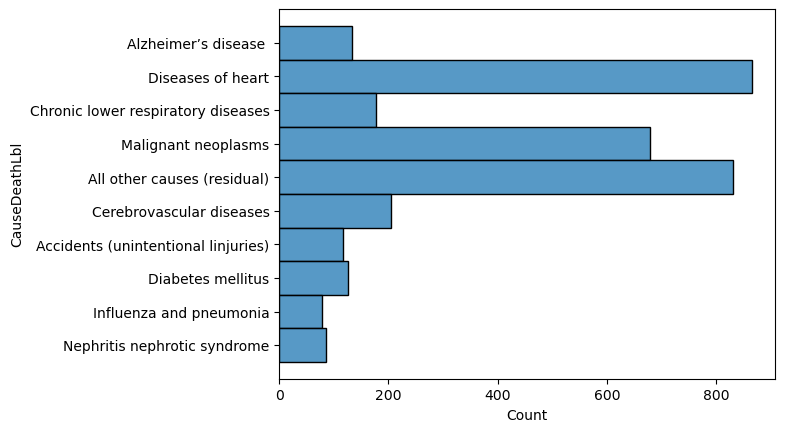

In [210]:

sns.histplot(data = mort_l, y = 'CauseDeathLbl')

In [219]:
dead = mortl[mortl['deceased']==1] 
#dead.info()

In [217]:
#mort2 = mort_dem[['CauseDeathLbl',     'YearsOld_mort',
#         'death_age_decade','SEQN',           'Gender','RaceEthnicity2', 'deceased',
#              'cause_death',           'diabetes',  
#       'mo_after_interview',      'mo_after_exam', 'AgeYears',]] # until 2021 demographics are added, can't do this

In [766]:
#dead_lbl = mort_dem.merge(mort_labels, left_on ='cause_death', right_on = 'CauseDeathNum')
#dead_lbl

In [223]:
dead_pivot = dead.pivot_table(values = 'deceased', index = 'CauseDeathLbl',  aggfunc='count', margins = True, observed=False).sort_values(by = 'deceased')
dead_pivot

,deceased
CauseDeathLbl,
Influenza and pneumonia,79
Nephritis nephrotic syndrome,85
Accidents (unintentional linjuries),117
Diabetes mellitus,126
Alzheimer’s disease,134
Chronic lower respiratory diseases,177
Cerebrovascular diseases,204
Malignant neoplasms,679
All other causes (residual),831


In [239]:
deaths_known_cause = dead[dead['cause_death']<=9]
known_death_pivot = deaths_known_cause.pivot_table(values = 'deceased', index = 'CauseDeathLbl',  aggfunc='count', margins = True, observed=False).sort_values(by = 'deceased')
known_death_pivot

,deceased
CauseDeathLbl,
Influenza and pneumonia,79
Nephritis nephrotic syndrome,85
Accidents (unintentional linjuries),117
Diabetes mellitus,126
Alzheimer’s disease,134
Chronic lower respiratory diseases,177
Cerebrovascular diseases,204
Malignant neoplasms,679
Diseases of heart,865


In [241]:
# Uncomment when demographics added for 2021
# Plot deaths with a known cause (drop out the "other" category)
#cause_death_plot = sns.scatterplot(data = deaths_known_cause, y = 'YearsOld_mort', x= 'AgeYears', hue = 'CauseDeathLbl', style = 'CauseDeathLbl', palette="deep" )
#sns.move_legend(cause_death_plot, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(
#    cause_death_plot, "lower center",
#   bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
#)
# help from https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [243]:
#dead_and_cond = dead_lbl.merge(medical_conditions_selected, on = 'SEQN')
#dead_and_cond

In [245]:
# Of the people who have since died, how old were they when they participated in 1999 and how many conditions did they report then?
#dc_pivot = dead_and_cond.pivot_table(values ='condition_score', index = 'AgeYears')
#dc_pivot

In [237]:
#sns.scatterplot(data = dead_and_cond, y ='AgeYears',x = 'condition_score' )

In [247]:
#dead_pivot2 = dead_and_cond.pivot_table(values = 'deceased', index = 'CauseDeathLbl',  aggfunc='count', margins = True, observed=False).sort_values('deceased')
#dead_pivot3 = dead_and_cond.pivot_table(values = 'condition_score', index = 'CauseDeathLbl',  aggfunc='mean', margins = True, observed=False).sort_values('condition_score')

In [251]:
#dead_pivot2

In [253]:
#dead_pivot3

In [255]:
# considering adults who died, what conditions did they have?
#mort_and_conditions = dead_lbl.merge(medical_conditions_selected, how = 'left', on = 'SEQN')
#mort_and_conditions.columns

In [261]:
#mort_cond = mort_and_conditions[['SEQN', 'CauseDeathLbl', 'asthma', 'bp', 'tested_lead',
#       'arthritis', 'congestive_heart', 'coronary', 'angina', 'heart_attack',
#      'stroke', 'emphysena', 'cancer','mo_after_interview', 'AgeYears', 'Gender', 'RaceEthnicity2','CauseDeathNum', 'condition_score','FamilyHistory_score' ]]
#mort_cond

In [263]:
# How many per cause of death - by decades of life
#death_cond_pivot = dead_lbl.pivot_table(columns= 'death_age_decade' , index = 'CauseDeathLbl',values ='SEQN', aggfunc='count', margins = True).sort_values('All', ascending = False)
#death_cond_pivot.tail(50)

In [265]:
# If they died of cancer, what condiditions did they report?
#death_cond_cancer =mort_cond[mort_cond['CauseDeathNum']==2]
#death_cond_cancer

In [826]:
#mort_cond['conditions_pos'] = if(adults_med_cond[(adults_med_cond['congestive_heart']==1.0) |  (adults_med_cond['coronary']==1.0) | (adults_med_cond['angina']==1.0) | (adults_med_cond['heart_attack']==1.0)|(adults_med_cond['asthma']==1.0) |  (adults_med_cond['bp']==1.0) | (adults_med_cond['arthritis']==1.0) | (adults_med_cond['stroke']==1.0) | (adults_med_cond['emphysena']==1.0) |  (adults_med_cond['cancer']==1.0) | (adults_med_cond['tested_lead']==1.0) ],1, else 0)

#condition_score = 

In [267]:
# of people who had conditions, what death or survival?
#cond_pos_mort = conditions_positive.merge(mort_l, on = 'SEQN')
#cond_pos_mort

In [271]:
# Check corr of Caffeine to Causes of Death - Found no correlations; deleted
#adult_caffeine2